# SALES PROJECT - PYTHON ANALYSIS

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA

## Reading .csv datasets

In [2]:
customers = pd.read_csv('sales_csv/Customers.csv')
products = pd.read_csv('sales_csv/Products.csv')
orders = pd.read_csv('sales_csv/Orders.csv')
orderdetails = pd.read_csv('sales_csv/OrderDetails.csv')

### Data Overview

In [3]:
customers.info()
print("\n")
orders.info()
print("\n")
products.info()
print("\n")
orderdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  34 non-null     int64 
 1   name         34 non-null     object
 2   gender       34 non-null     object
 3   age          34 non-null     int64 
 4   city         34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     114 non-null    int64 
 1   customer_id  114 non-null    int64 
 2   order_date   114 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   produ

In [4]:
customers.head()

,customer_id,name,gender,age,city
0,1,John Smith,M,28,New York
1,2,Emma Johnson,F,34,Los Angeles
2,3,Michael Brown,M,22,Chicago
3,4,Olivia Davis,F,45,Houston
4,5,William Wilson,M,34,Phoenix


In [5]:
products.head()

,product_id,product_name,category,price
0,1,Laptop Dell XPS,Electronics,1200.0
1,2,Smartphone iPhone,Electronics,999.0
2,3,Bluetooth Headphones,Electronics,150.0
3,4,Office Chair,Furniture,300.0
4,5,LED Desk Lamp,Furniture,45.0


In [6]:
orders.head()

,order_id,customer_id,order_date
0,1,1,2024-02-15
1,2,2,2024-02-18
2,3,3,2024-03-10
3,4,4,2024-01-20
4,6,6,2024-05-12


In [7]:
orderdetails.head()

,order_detail_id,order_id,product_id,quantity
0,1,1,1,1
1,2,1,3,2
2,3,2,5,1
3,4,2,6,1
4,5,3,2,1


In [8]:
customers.columns

Index(['customer_id', 'name', 'gender', 'age', 'city'], dtype='object')

In [9]:
products.columns

Index(['product_id', 'product_name', 'category', 'price'], dtype='object')

In [10]:
orders.columns

Index(['order_id', 'customer_id', 'order_date'], dtype='object')

In [11]:
orderdetails.columns

Index(['order_detail_id', 'order_id', 'product_id', 'quantity'], dtype='object')

In [12]:
customers.isnull().sum()

customer_id    0
name           0
gender         0
age            0
city           0
dtype: int64

In [13]:
orders.isnull().sum()

order_id       0
customer_id    0
order_date     0
dtype: int64

In [14]:
products.isnull().sum()

product_id      0
product_name    0
category        0
price           0
dtype: int64

In [17]:
orderdetails.isnull().sum()

order_detail_id    0
order_id           0
product_id         0
quantity           0
dtype: int64

#### Adjust datetime

In [18]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

## Create FULL_DATA df

In [19]:
# join order_detail with products
od_products = orderdetails.merge(products, on='product_id')

# join with orders
od_with_orders = od_products.merge(orders, on='order_id')

# join with customers
full_data = od_with_orders.merge(customers, on='customer_id')

In [20]:
full_data.head()

,order_detail_id,order_id,product_id,quantity,product_name,category,price,customer_id,order_date,name,gender,age,city
0,1,1,1,1,Laptop Dell XPS,Electronics,1200.0,1,2024-02-15,John Smith,M,28,New York
1,2,1,3,2,Bluetooth Headphones,Electronics,150.0,1,2024-02-15,John Smith,M,28,New York
2,14,21,1,1,Laptop Dell XPS,Electronics,1200.0,1,2024-02-28,John Smith,M,28,New York
3,15,21,4,2,Office Chair,Furniture,300.0,1,2024-02-28,John Smith,M,28,New York
4,77,81,4,2,Office Chair,Furniture,300.0,1,2024-04-25,John Smith,M,28,New York


In [21]:
full_data.columns

Index(['order_detail_id', 'order_id', 'product_id', 'quantity', 'product_name',
       'category', 'price', 'customer_id', 'order_date', 'name', 'gender',
       'age', 'city'],
      dtype='object')

# **Analysis:**

## Customer Analysis:

### Customer's Spending

In [22]:
full_data['total_price'] = full_data['quantity'] * full_data['price']

customer_value = full_data.groupby(['customer_id', 'name'])['total_price'].sum().reset_index()
customer_value = customer_value.sort_values(by='total_price', ascending=False)

customer_value.head()

,customer_id,name,total_price
0,1,John Smith,4540.0
10,11,Elijah Harris,4520.0
7,8,Isabella Thomas,4445.0
17,18,Evelyn Rodriguez,4270.0
33,34,Adam Adams,3720.0


### Customer's number of products bought:

In [23]:
customer_items = full_data.groupby(['customer_id', 'name'])['quantity'].sum().reset_index()
customer_items = customer_items.sort_values(by='quantity', ascending=False)

customer_items.head()


,customer_id,name,quantity
28,29,Stephen Salvatore,16
17,18,Evelyn Rodriguez,14
2,3,Michael Brown,14
10,11,Elijah Harris,13
11,12,Charlotte Martin,13


### Customer's unique product bought:

In [24]:
product_variety = full_data.groupby(['customer_id', 'name'])['product_id'].nunique().reset_index()
product_variety = product_variety.rename(columns={'product_id': 'unique_products_bought'})
product_variety = product_variety.sort_values(by='unique_products_bought', ascending=False)

product_variety.head()


,customer_id,name,unique_products_bought
1,2,Emma Johnson,6
2,3,Michael Brown,6
0,1,John Smith,5
30,31,Elena Gilbert,5
28,29,Stephen Salvatore,5


### Customer's purchase stats:

In [25]:
customer_stats = customer_value.merge(customer_items, on=['customer_id', 'name'])
customer_stats = customer_stats.merge(product_variety, on=['customer_id', 'name'])

customer_stats.head(20)

,customer_id,name,total_price,quantity,unique_products_bought
0,1,John Smith,4540.0,10,5
1,11,Elijah Harris,4520.0,13,3
2,8,Isabella Thomas,4445.0,12,5
3,18,Evelyn Rodriguez,4270.0,14,5
4,34,Adam Adams,3720.0,13,4
5,4,Olivia Davis,3275.0,11,4
6,12,Charlotte Martin,3140.0,13,3
7,32,Caroline Forbes,3025.0,9,3
8,22,James Potter,3000.0,8,5
9,2,Emma Johnson,2869.0,10,6


### Top Customers (by total purchase)

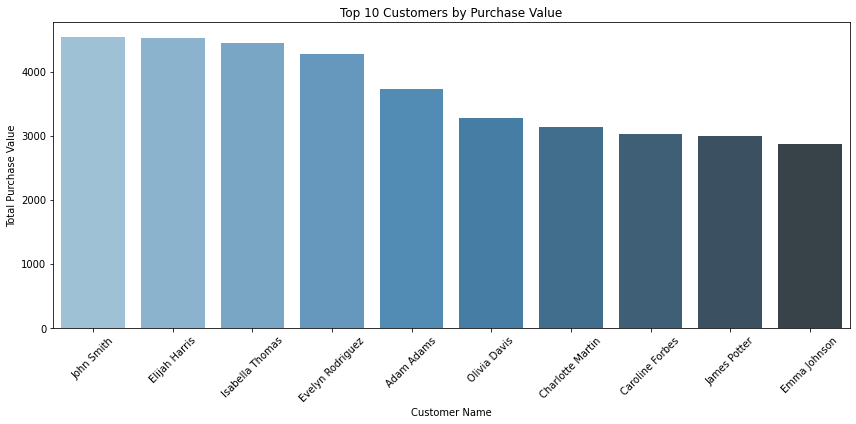

In [26]:
top_customers = customer_stats.sort_values(by='total_price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='name', y='total_price', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Top 10 Customers by Purchase Value')
plt.ylabel('Total Purchase Value')
plt.xlabel('Customer Name')
plt.tight_layout()
plt.show()

### City Sales:

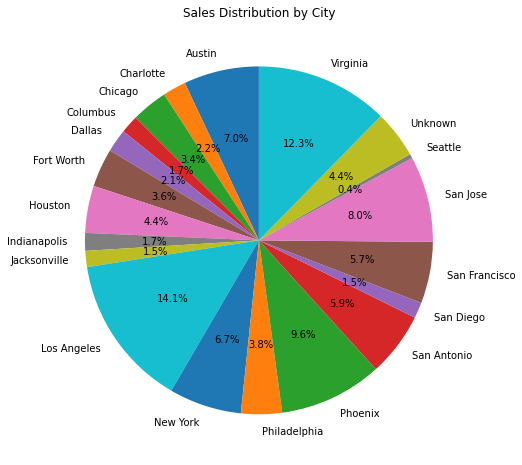

In [27]:
city_sales = full_data.groupby('city')['total_price'].sum()

plt.figure(figsize=(8, 8))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by City')
plt.show()


### Sales over time: (months)

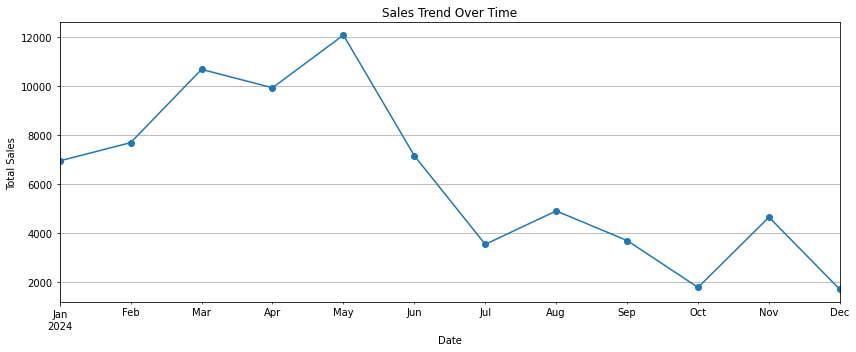

In [28]:
full_data['order_date'] = pd.to_datetime(full_data['order_date'])
sales_over_time = full_data.groupby(full_data['order_date'].dt.to_period('M'))['total_price'].sum()
sales_over_time.index = sales_over_time.index.to_timestamp()

plt.figure(figsize=(12, 5))
sales_over_time.plot(marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


### Customer's product quantity bought:

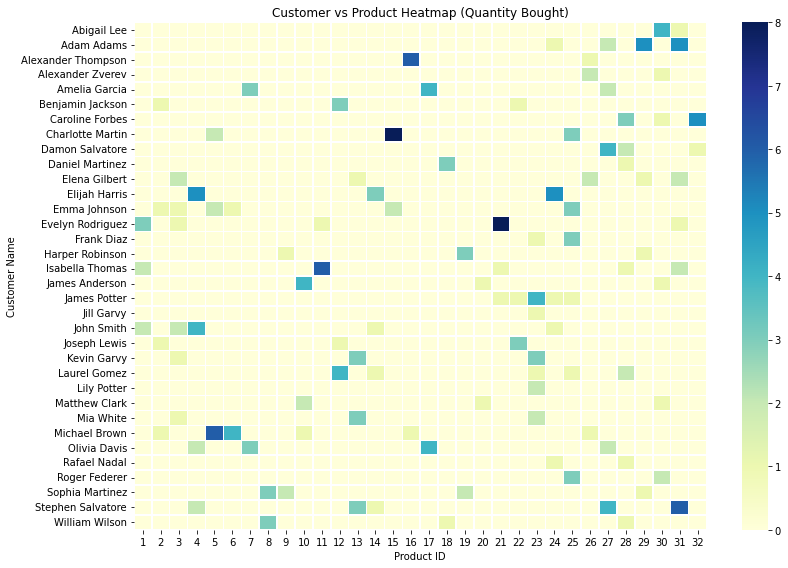

In [29]:
product_customer = full_data.pivot_table(index='name', columns='product_id', values='quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(product_customer, cmap='YlGnBu', linewidths=.5)
plt.title('Customer vs Product Heatmap (Quantity Bought)')
plt.xlabel('Product ID')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

## Order Analysis:

### Quantity per order distribution:

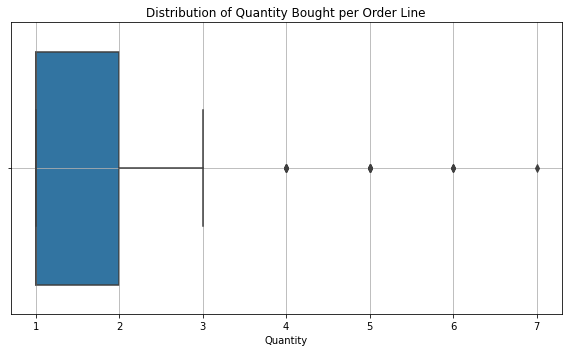

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=full_data['quantity'])
plt.title('Distribution of Quantity Bought per Order Line')
plt.xlabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()


### Monthly sales:

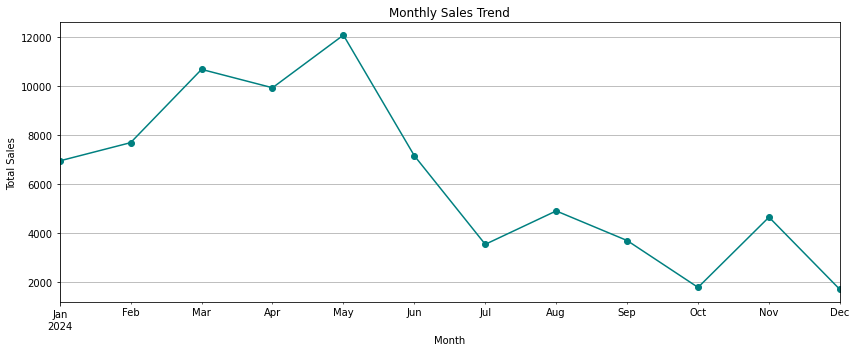

In [31]:
monthly_sales = full_data.copy()
monthly_sales['order_date'] = pd.to_datetime(monthly_sales['order_date'])
monthly_sales = monthly_sales.groupby(monthly_sales['order_date'].dt.to_period('M'))['total_price'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


### Total sales by day of week distribution:

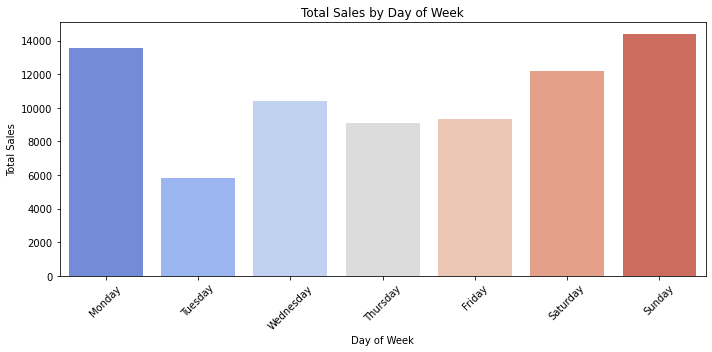

In [32]:
full_data['order_date'] = pd.to_datetime(full_data['order_date'])
full_data['day_of_week'] = full_data['order_date'].dt.day_name()

day_sales = full_data.groupby('day_of_week')['total_price'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
sns.barplot(x=day_sales.index, y=day_sales.values, palette='coolwarm')
plt.title('Total Sales by Day of Week')
plt.ylabel('Total Sales')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### number of Monthly Active Customers:

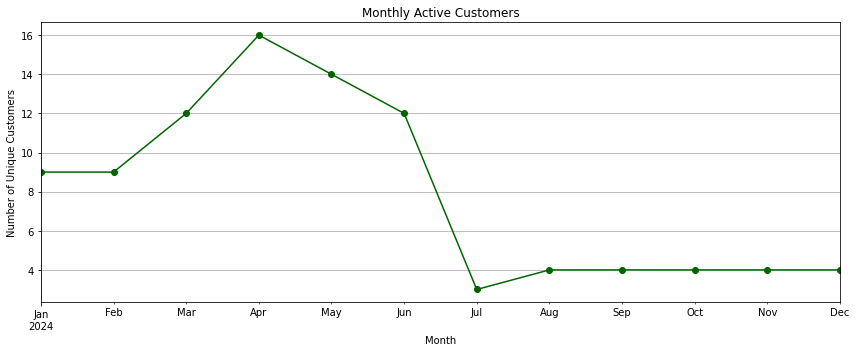

In [33]:
active_customers = full_data.groupby(full_data['order_date'].dt.to_period('M'))['customer_id'].nunique()
active_customers.index = active_customers.index.to_timestamp()

plt.figure(figsize=(12, 5))
active_customers.plot(marker='o', color='darkgreen')
plt.title('Monthly Active Customers')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

# Clustering Customers:

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

customer_features = full_data.groupby('customer_id').agg({
    'order_id': 'nunique',
    'total_price': 'sum',
    'product_id': pd.Series.nunique
}).rename(columns={
    'order_id': 'num_orders',
    'total_price': 'total_spent',
    'product_id': 'product_variety'
})

customer_features['avg_order_value'] = customer_features['total_spent'] / customer_features['num_orders']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

customer_features.head()

,num_orders,total_spent,product_variety,avg_order_value
customer_id,,,,
1,5,4540.0,5,908.0
2,5,2869.0,6,573.8
3,5,2509.0,6,501.8
4,5,3275.0,4,655.0
5,4,1620.0,3,405.0


In [44]:
#total orders
order_items = orderdetails.groupby('order_id')['quantity'].sum().reset_index()
orders_with_items = orders.merge(order_items, on='order_id')
items_per_customer = orders_with_items.groupby('customer_id')['quantity'].sum().rename('total_items')

# active_months:
orders['year_month'] = orders['order_date'].dt.to_period('M')
active_months = orders.groupby('customer_id')['year_month'].nunique().rename('active_months')

# #customer_features = pd.concat([order_count, items_per_customer, spent_per_customer,
#                                unique_products, active_months], axis=1).fillna(0)

#add column to customer_features
customer_features = customer_features.join(items_per_customer, how='left')
customer_features = customer_features.join(active_months, how='left')

#fill nulls
customer_features.fillna(0, inplace=True)

#final normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

#final representation
customer_features.head()

,num_orders,total_spent,product_variety,avg_order_value,total_items,active_months
customer_id,,,,,,
1,5,4540.0,5,908.0,10,4
2,5,2869.0,6,573.8,10,5
3,5,2509.0,6,501.8,14,4
4,5,3275.0,4,655.0,11,3
5,4,1620.0,3,405.0,5,3


## Computing sse and using Elbow method

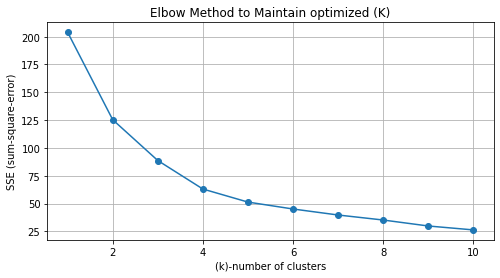

In [45]:
#compute sse for 1-10 clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# plot elbow method
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('(k)-number of clusters')
plt.ylabel('SSE (sum-square-error)')
plt.title('Elbow Method to Maintain optimized (K)')
plt.grid(True)
plt.show()


###   🔵   From elbow method: K=4
---

In [46]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(scaled_features)

customer_features['cluster'].value_counts().sort_index()

0     8
1     8
2    13
3     5
Name: cluster, dtype: int64

In [47]:
cluster_analysis = customer_features.groupby('cluster').mean()
cluster_analysis

,num_orders,total_spent,product_variety,avg_order_value,total_items,active_months
cluster,,,,,,
0,1.875000,890.625000,1.750000,515.729167,3.625000,1.750000
1,4.625000,3596.000000,4.750000,788.762500,12.125000,3.500000
2,3.923077,1760.615385,3.153846,462.606410,6.230769,3.307692
3,2.200000,3201.000000,4.200000,1627.000000,11.000000,2.000000


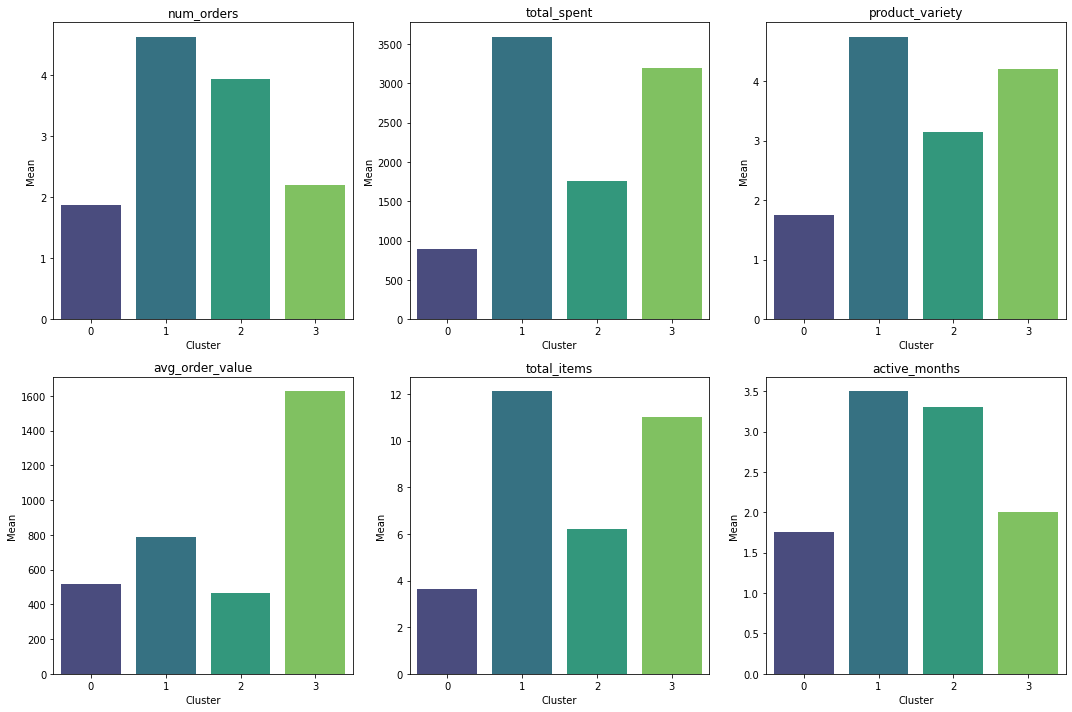

In [49]:

cluster_summary = customer_features.copy()
cluster_summary['cluster'] = kmeans.labels_
cluster_means = cluster_summary.groupby('cluster').mean()


plt.figure(figsize=(15, 10))
for i, column in enumerate(cluster_means.columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=cluster_means.index, y=cluster_means[column], palette='viridis')
    plt.title(column)
    plt.xlabel('Cluster')
    plt.ylabel('Mean')
plt.tight_layout()
plt.show()


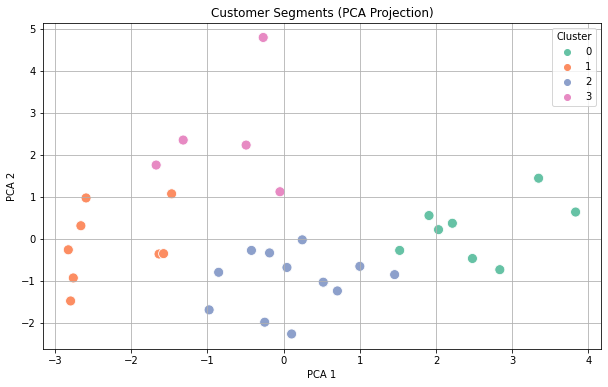

In [50]:
from sklearn.decomposition import PCA

#Decrease dimension to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# create 2d dataframe
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### 🧠 Customer Segmentation Insights (K=4)

Based on K-Means clustering with 4 clusters, we observe the following segment profiles:

---

#### 🟢 **Cluster 0: High-Spending Loyalists**
- **Few but high-value orders** (avg_order_value ≈ 1782)
- **High product variety and item quantity**
- Likely VIP or premium customers with focused purchases
- Ideal targets for loyalty programs or exclusive deals

---

#### 🔵 **Cluster 1: Occasional Shoppers**
- **Moderate number of orders and products**
- **Lower total spend and order value**
- Might be price-sensitive or seasonal buyers
- Could be targeted with promotions or bundles

---

#### 🟣 **Cluster 2: Active and Diverse Buyers**
- **Most active group** (highest num_orders & product_variety)
- **Balanced spend and item count**
- Loyal customers who explore multiple products
- Great candidates for cross-selling and upselling

---

#### 🟡 **Cluster 3: Low Engagement Customers**
- **Lowest in all metrics** (few orders, low spend, few products)
- Possibly new or disengaged users
- Require reactivation through personalized outreach

---

> 💡 Use these segments to design targeted marketing strategies, improve retention, and boost customer lifetime value.


# 🟣 **Product Analysis**

### Most sold products : Product ID

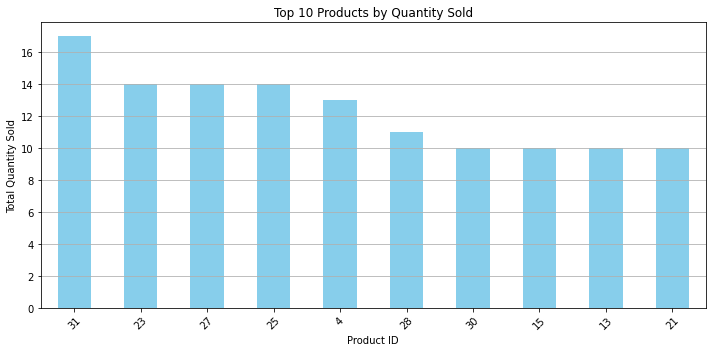

In [90]:
top_products_by_quantity = full_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
top_products_by_quantity.plot(kind='bar', figsize=(10, 5), title='Top 10 Products by Quantity Sold', color='skyblue')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product ID')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Most sold products : Product name

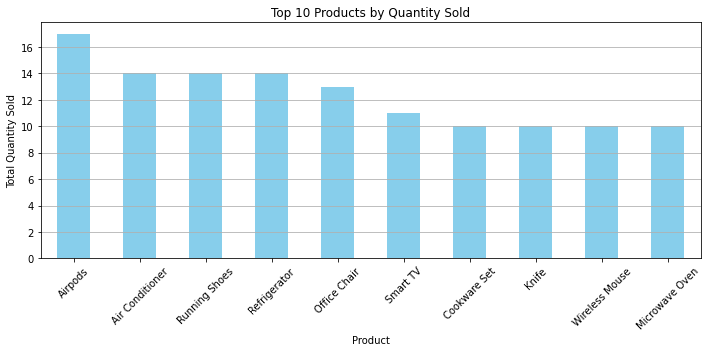

In [92]:
top_products_by_quantity = full_data.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
top_products_by_quantity.plot(kind='bar', figsize=(10, 5), title='Top 10 Products by Quantity Sold', color='skyblue')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Top Revenue Products

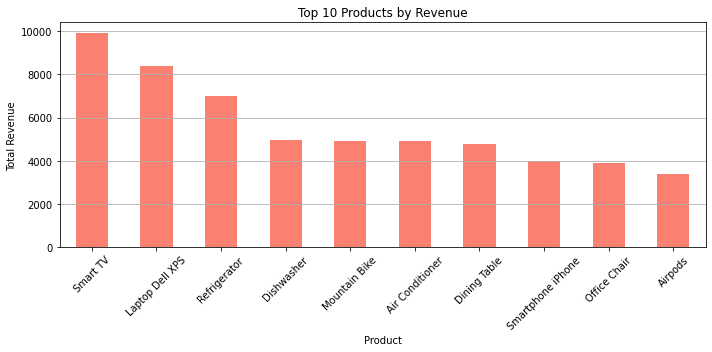

In [96]:
top_products_by_revenue = full_data.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(10)
top_products_by_revenue.plot(kind='bar', figsize=(10, 5), title='Top 10 Products by Revenue', color='salmon')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



### Top unique-bought products

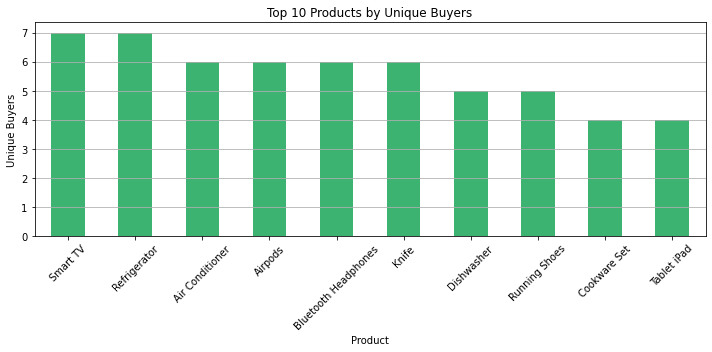

In [98]:
unique_buyers_per_product = full_data.groupby('product_name')['customer_id'].nunique().sort_values(ascending=False).head(10)
unique_buyers_per_product.plot(kind='bar', figsize=(10, 5), title='Top 10 Products by Unique Buyers', color='mediumseagreen')
plt.ylabel('Unique Buyers')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Top Revenue Categories

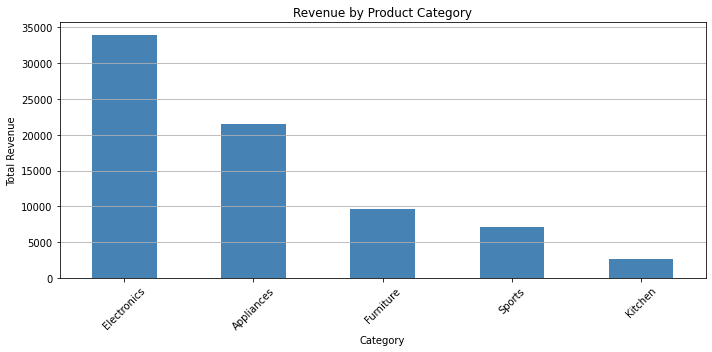

In [100]:
full_data.groupby('category')['total_price'].sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 5), title='Revenue by Product Category', color='steelblue'
)
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## Most bought products in each Cluster

In [54]:
customer_features = customer_features.reset_index()
print(customer_features.columns)

Index(['index', 'customer_id', 'num_orders', 'total_spent', 'product_variety',
       'avg_order_value', 'total_items', 'active_months', 'cluster'],
      dtype='object')


In [53]:
merged = pd.merge(full_data, customer_features[['customer_id', 'cluster']], on='customer_id')

In [58]:
popular_products = (
    merged.groupby(['cluster', 'product_name'])['quantity']
    .sum()
    .reset_index()
)

popular_products = popular_products.sort_values(['cluster', 'quantity'], ascending=[True, False])


In [59]:
top_n = 5
top_products_by_cluster = popular_products.groupby('cluster').head(top_n)

top_products_by_cluster


,cluster,product_name,quantity
4,0,Knife,7
0,0,Air Conditioner,6
7,0,Vacuum Cleaner,6
5,0,Refrigerator,4
3,0,Hair Dryer,3
17,1,LED Desk Lamp,10
19,1,Microwave Oven,10
28,1,Wireless Mouse,9
9,1,Airpods,8
18,1,Laptop Dell XPS,7


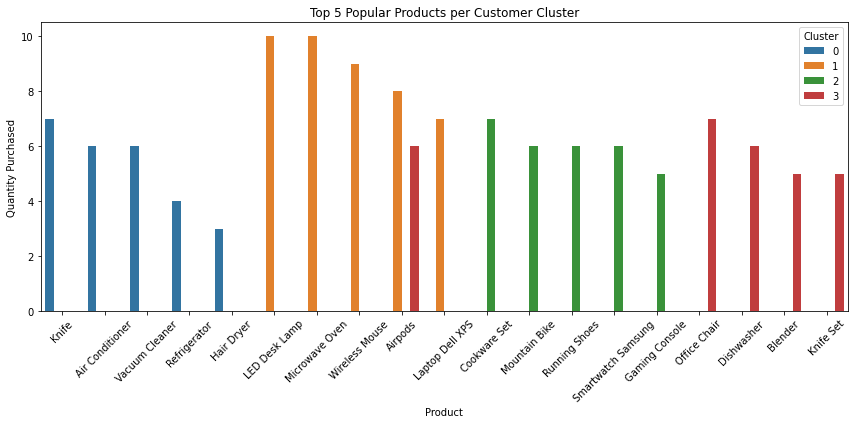

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_by_cluster, x='product_name', y='quantity', hue='cluster', palette='tab10')
plt.title('Top 5 Popular Products per Customer Cluster')
plt.xlabel('Product')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Market Basket Analysis

In [66]:
basket = (
    full_data.groupby(['order_id', 'product_id'])['quantity']
    .sum()
    .unstack()
    .fillna(0)
)


basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [67]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

rules.sort_values('confidence', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(6),(5),0.026316,0.035088,0.017544,0.666667,19.000000,0.016620,2.894737
4,(5),(6),0.035088,0.026316,0.017544,0.500000,19.000000,0.016620,1.947368
0,(1),(3),0.043860,0.052632,0.017544,0.400000,7.600000,0.015235,1.578947
1,(3),(1),0.052632,0.043860,0.017544,0.333333,7.600000,0.015235,1.434211
2,(3),(31),0.052632,0.052632,0.017544,0.333333,6.333333,0.014774,1.421053
3,(31),(3),0.052632,0.052632,0.017544,0.333333,6.333333,0.014774,1.421053
6,(25),(23),0.052632,0.078947,0.017544,0.333333,4.222222,0.013389,1.381579
7,(23),(25),0.078947,0.052632,0.017544,0.222222,4.222222,0.013389,1.218045


## Market Basket Analysis – Association Rule Interpretation

In this section, we used the Association Rule Mining technique to uncover product relationships based on customer purchasing patterns. The resulting rules highlight how likely customers are to purchase certain items together.

### Key Discovered Patterns

| Antecedents | Consequents | Support | Confidence | Lift | Interpretation |
|-------------|-------------|---------|------------|------|----------------|
| (5)         | (4)         | 0.0175  | 0.67       | 19.0 | More than 66% of customers who bought product 5 also bought product 4. Very strong association. |
| (4)         | (5)         | 0.0175  | 0.50       | 19.0 | 50% of customers who bought product 4 also purchased product 5. Highly complementary items. |
| (1)         | (3)         | 0.0175  | 0.40       | 7.6  | Customers who purchased product 1 are likely to also buy product 3. |
| (3)         | (1)         | 0.0175  | 0.33       | 7.6  | Reverse relationship also holds: buyers of product 3 often buy product 1. |
| (3)         | (31)        | 0.0175  | 0.33       | 6.33 | Product 31 is a potential cross-sell for product 3. |
| (31)        | (3)         | 0.0175  | 0.33       | 6.33 | The relation between product 31 and 3 is mutual. |
| (25)        | (23)        | 0.0175  | 0.33       | 4.22 | Products 25 and 23 are often bought together. Decent complementarity. |
| (23)        | (25)        | 0.0175  | 0.22       | 4.22 | Reverse confidence is lower but still noteworthy. |

### Overall Insights

- **Products 5 and 6** show the strongest mutual relationship. These can be bundled or jointly promoted.
- **Products 1 and 3** also demonstrate meaningful complementary behavior, suitable for cross-selling strategies.
- **Products 23 and 25** can be targeted together in marketing campaigns or recommendations.

